In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def log_loss(y, y_hat):
  loss = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -loss

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [6]:
churn.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Intl Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'State', 'Area Code', 'Phone', 'Churn'],
      dtype='object')

In [7]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
y = np.array(y).reshape(len(y), 1) #Reshaping our data to (m,1) shape. Not compulsory
X = churn[cols]
X.shape

(5700, 5)

In [8]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape


(3420, 5)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train

array([[-1.8525591 , -0.54121117,  1.87596728,  0.0724823 ,  2.13378709],
       [ 0.93155078,  1.05292599,  0.39854651, -0.54879454, -0.81991418],
       [ 0.46912157,  0.11462924,  1.13324217,  0.0724823 , -2.27130187],
       ...,
       [-0.52565742, -0.04014136, -0.68543069,  0.69375914,  0.55508469],
       [-0.94359172, -0.58957698, -0.37428909,  1.93631281, -0.36158122],
       [-0.58604336,  2.40910335,  1.70935597,  0.69375914, -0.25972945]])

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

print("coef = ",model.coef_)
print("intercept = ",model.intercept_)

coef =  [[0.68445262 0.29104301 0.1363756  0.79630985 0.06125924]]
intercept =  [-0.01220319]


In [11]:
pd.DataFrame({
    'Feature': ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length'], 
    'Coefficient': model.coef_[0]  # flatten to 1D array
})


,Feature,Coefficient
0,Day Mins,0.684453
1,Eve Mins,0.291043
2,Night Mins,0.136376
3,CustServ Calls,0.796310
4,Account Length,0.061259


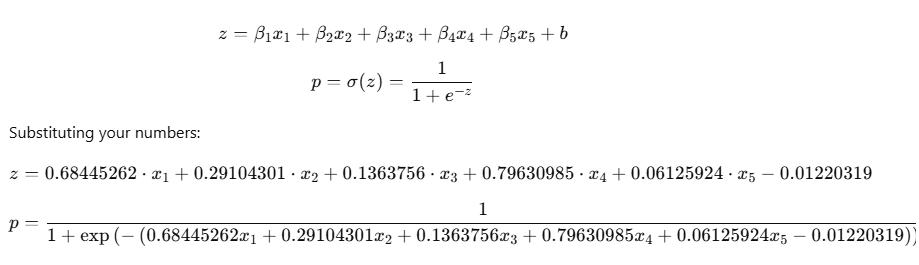

In [12]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [13]:
model.predict_proba(X_test)

array([[0.23933095, 0.76066905],
       [0.54163766, 0.45836234],
       [0.78613124, 0.21386876],
       ...,
       [0.55603164, 0.44396836],
       [0.22971275, 0.77028725],
       [0.76042272, 0.23957728]])

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,model.predict(X_test))

0.7008771929824561

# In logistic regression using sklearn, regularization is controlled by hyperparameter C - inverse of lambda (strength). Large C = less regularization. Small C is more regularization

# High Lambda - more regularization - low C
# Low lambda - low regularization - high C

# High C - more freedom to the algorithm to set weights
# low C - less freedom and more restriction

# C is inverse of L2 regularization - Ridge or w squared

In [15]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = accuracy_score(y_train, scaled_lr.predict(X_train))
  val_score = accuracy_score(y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

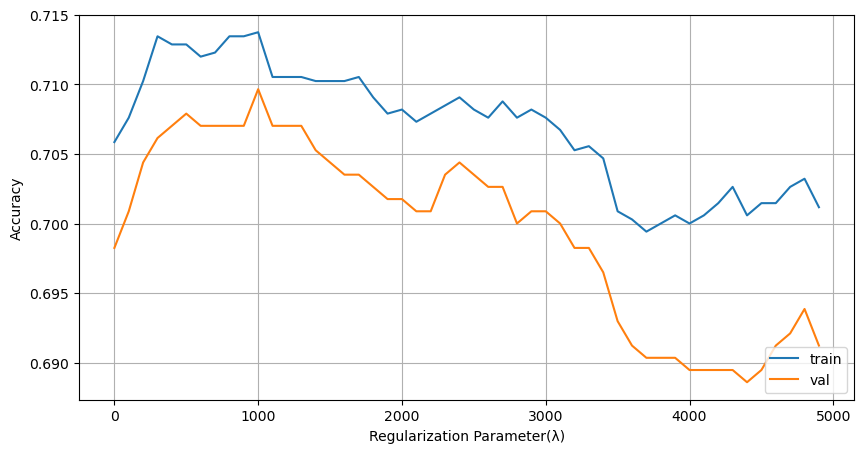

In [16]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [17]:
model = LogisticRegression(C=1/1000)
model.fit(X_train, y_train)

print("Train acc = ",accuracy_score(y_train, model.predict(X_train)))


print("Test acc = ",accuracy_score(y_test, model.predict(X_test)))

Train acc =  0.7137426900584796
Test acc =  0.7096491228070175


# Multi Class classification

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

In [23]:
X = pd.DataFrame(X)
X.columns = ['x1','x2']

In [24]:
X

,x1,x2
0,-1.060463,-0.946152
1,-1.073287,1.125797
2,-1.302515,1.276093
3,-0.982025,-0.014194
4,1.106089,-0.578337
...,...,...
493,-0.814026,0.646940
494,-1.395764,-0.967783
495,1.266478,-0.699243
496,-1.927197,-0.486581


In [25]:
y # classes are 0, 1 , 2

array([[0],
       [2],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [2],
       [1],
       [2],
       [0],
       [0],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [1],
       [2],
       [0],
       [0],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [2],
       [0],
       [0],
       [1],
       [0],
       [2],
       [2],
       [0],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [0],
       [0],
       [2],
    

In [26]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape


(298, 2)

In [31]:
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)


print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}') 

Training Accuracy:0.9161073825503355
Validation Accuracy :0.91
Test Accuracy:0.91


In [32]:
model.predict_proba(X_test)

array([[9.59447533e-01, 1.12974170e-02, 2.92550496e-02],
       [7.27274702e-04, 5.30302311e-02, 9.46242494e-01],
       [6.81506783e-01, 2.84702925e-05, 3.18464747e-01],
       [2.92439159e-03, 5.22664715e-02, 9.44809137e-01],
       [8.50039423e-04, 1.70294384e-02, 9.82120522e-01],
       [6.24808462e-01, 3.65320653e-01, 9.87088491e-03],
       [9.41919563e-01, 2.82594559e-02, 2.98209815e-02],
       [9.09975164e-01, 8.48435098e-02, 5.18132636e-03],
       [4.45205281e-02, 8.40269644e-02, 8.71452508e-01],
       [1.91288147e-01, 7.47485100e-01, 6.12267531e-02],
       [8.51968119e-01, 1.68235517e-04, 1.47863646e-01],
       [7.37143479e-04, 9.58528630e-02, 9.03409993e-01],
       [8.86165615e-01, 1.04419571e-01, 9.41481442e-03],
       [8.40500420e-01, 1.05486378e-01, 5.40132019e-02],
       [8.60776414e-04, 9.66592346e-01, 3.25468772e-02],
       [5.27110160e-04, 1.05574295e-01, 8.93898595e-01],
       [8.40755710e-01, 6.83711653e-02, 9.08731247e-02],
       [2.32739301e-05, 1.26672